In [18]:

import numpy as np
import random
from numpy import loadtxt
from scipy.optimize import curve_fit
import os
import matplotlib.pyplot as plt

import scipy.special
from scipy.optimize import fmin
from tqdm import tqdm

# Load data

In [19]:
data = np.loadtxt("./results/critical-atom-numbers/recipe-7-nc/functionals_E_N.dat")
# the header is: a_s  n_c_best_possible_fit  rho_min_x  rho_max_x  alpha  alpha_opt  beta  gamma  min_energy  
# read all data
a_s = data[:,0]
n_c_best_possible_fit = data[:,1]
rho_min_x = data[:,2]
rho_max_x = data[:,3]
alpha = data[:,4]
alpha_opt = data[:,5]
beta = data[:,6]
gamma = data[:,7]

# Take only the data where rho_min_x is smaller than 0.7, and rho_max_x is larger than 2.0
indices = np.where((rho_min_x < 0.7) & (rho_min_x > 0.4) & (rho_max_x > 1.5) & (rho_max_x < 2.5))
a_s = a_s[indices]
n_c_best_possible_fit = n_c_best_possible_fit[indices]
rho_min_x = rho_min_x[indices]
rho_max_x = rho_max_x[indices]
alpha = alpha[indices]
alpha_opt = alpha_opt[indices]
beta = beta[indices]
gamma = gamma[indices]





In [20]:
set(rho_min_x), set(rho_max_x)

({0.5, 0.6}, {1.7, 1.9, 2.1, 2.3})

In [21]:
for c in zip(rho_min_x, rho_max_x):
    print(c)

(0.5, 1.7)
(0.5, 1.7)
(0.5, 1.7)
(0.5, 1.7)
(0.5, 1.7)
(0.5, 1.9)
(0.5, 1.9)
(0.5, 1.9)
(0.5, 1.9)
(0.5, 1.9)
(0.5, 1.9)
(0.5, 2.1)
(0.5, 2.1)
(0.5, 2.1)
(0.5, 2.1)
(0.5, 2.1)
(0.5, 2.1)
(0.5, 2.3)
(0.5, 2.3)
(0.5, 2.3)
(0.5, 2.3)
(0.5, 2.3)
(0.5, 2.3)
(0.6, 1.7)
(0.6, 1.7)
(0.6, 1.7)
(0.6, 1.7)
(0.6, 1.7)
(0.6, 1.9)
(0.6, 1.9)
(0.6, 1.9)
(0.6, 1.9)
(0.6, 1.9)
(0.6, 1.9)
(0.6, 2.1)
(0.6, 2.1)
(0.6, 2.1)
(0.6, 2.1)
(0.6, 2.1)
(0.6, 2.1)
(0.6, 2.3)
(0.6, 2.3)
(0.6, 2.3)
(0.6, 2.3)
(0.6, 2.3)
(0.6, 2.3)


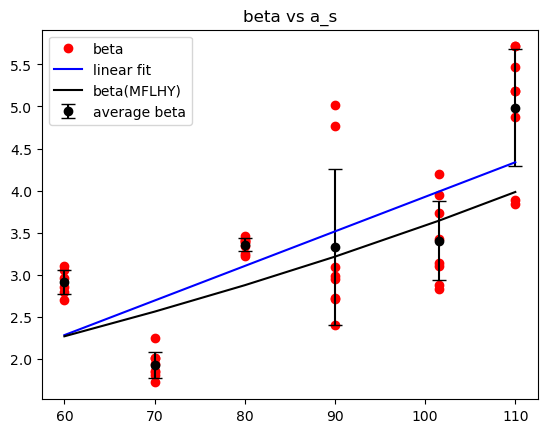

In [22]:
# Plot beta vs a_s
plt.plot(a_s, beta, 'o', label='beta', color='red')
# On the same plot, plot the error bar for each a_s
a_s_unique = np.unique(a_s)
average = np.zeros(len(a_s_unique))
std = np.zeros(len(a_s_unique))
for i in range(len(a_s_unique)):
    average[i] = np.average(beta[a_s==a_s_unique[i]])
    std[i] = np.std(beta[a_s==a_s_unique[i]])
# plot the error bar for each a_s, with larger error bars for a_s with less data points
plt.errorbar(a_s_unique, average, yerr=std, fmt='o', label='average beta', capsize=5, color='black')
# Make a linear fit of the average beta vs a_s
def func_beta(x, a, b):
    return a*x + b
popt_beta, pcov = curve_fit(func_beta, a_s_unique, average)
plt.plot(a_s_unique, func_beta(a_s_unique, *popt_beta), label='linear fit', color='blue')


beta_mflhy = 256*np.sqrt(np.pi)*(a_s_unique/r_0)**(5/2)/15 + 128*np.sqrt(np.pi)*np.sqrt((a_s_unique/r_0))/45
plt.plot(a_s_unique,beta_mflhy, label='beta(MFLHY)', color='black')


plt.title("beta vs a_s")
plt.legend(loc='best')

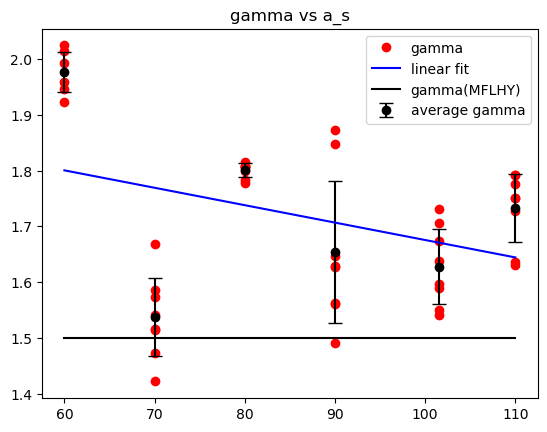

In [23]:
# Plot gamma vs a_s
plt.plot(a_s, gamma, 'o', label='gamma', color='red')
# On the same plot, plot the error bar for each a_s
a_s_unique = np.unique(a_s)
average = np.zeros(len(a_s_unique))
std = np.zeros(len(a_s_unique))
for i in range(len(a_s_unique)):
    average[i] = np.average(gamma[a_s==a_s_unique[i]])
    std[i] = np.std(gamma[a_s==a_s_unique[i]])
# plot the error bar for each a_s, with larger error bars for a_s with less data points
plt.errorbar(a_s_unique, average, yerr=std, fmt='o', label='average gamma', capsize=5, color='black')
# Make a linear fit of the average gamma vs a_s
def func_gamma(x, a, b):
    return a*x + b
popt_gamma, pcov = curve_fit(func_gamma, a_s_unique, average)
plt.plot(a_s_unique, func_gamma(a_s_unique, *popt_gamma), label='linear fit', color='blue')


plt.plot(a_s_unique,[1.5]*len(a_s_unique), label='gamma(MFLHY)', color='black')


plt.title("gamma vs a_s")
plt.legend(loc='best')

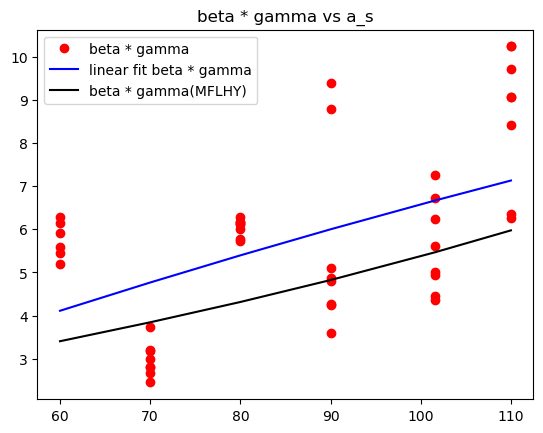

In [26]:
# Plot beta*gamma vs a_s
plt.plot(a_s, beta*gamma, 'o', label='beta * gamma', color='red')

plt.plot(a_s_unique, func_beta(a_s_unique, *popt_beta) * func_gamma(a_s_unique, *popt_gamma), label='linear fit beta * gamma', color='blue')


plt.plot(a_s_unique,np.array([1.5]*len(a_s_unique)) * np.array(beta_mflhy), label='beta * gamma(MFLHY)', color='black')


plt.title("beta * gamma vs a_s")
plt.legend(loc='best')


# Estimate $n_c$ for each $a_s$ value, using fits


In [7]:
from estimate_nc.estimate_nc import estimate_nc, en_per_particle

In [8]:
a_s = np.linspace(60, 110, 50)
r_0 = 387.6   # https://www.wolframalpha.com/input?i=%28162Dy+mass%29+*+%28mu_0%29+*+%289.93+bohr+magneton%29%5E2+%2F+%284+pi+hbar%5E2%29+%2F+%28bohr+radius%29
# for each a_s, find the best possible fit for n_c, using the fits func_beta and func_gamma
n_c_best_possible_fit = np.zeros(len(a_s))
for i in tqdm(range(len(a_s))):
    alpha = 2*np.pi*(a_s[i]/r_0) # * (1 - 1 / (3*(a_s / r_0)))
    n_c_best_possible_fit[i] = estimate_nc(alpha,func_beta(a_s[i], *popt_beta), func_gamma(a_s[i], *popt_gamma), based_on="size")[0]


  0%|          | 0/50 [00:00<?, ?it/s]

nparticles: 285000.0, sr_local_min: [15.72344689 15.32284569 14.92224449 14.52164329 14.12104208 13.72044088
 13.31983968 12.91923848 12.51863727 12.11803607 11.71743487 11.31683367
 10.91623246 10.51563126 10.11503006], sz_local_min: [ 613.29579158  641.350501    673.41302605  709.48336673  745.55370741
  789.63967936  833.7256513   885.82725451  937.92885772 1002.05390782
 1066.17895792 1142.32745491 1226.49158317 1318.67134269 1426.88236473]
nparticles: 270750.0, sr_local_min: [15.32284569 14.92224449 14.52164329 14.12104208 13.72044088 13.31983968
 12.91923848 12.51863727 12.11803607 11.71743487 11.31683367 10.91623246
 10.51563126 10.11503006], sz_local_min: [ 613.29579158  641.350501    673.41302605  709.48336673  749.56152305
  793.64749499  841.74128257  893.84288577  949.95230461 1014.07735471
 1086.21803607 1166.3743487  1254.54629259 1354.74168337]
nparticles: 257212.5, sr_local_min: [15.32284569 14.92224449 14.52164329 14.12104208 13.72044088 13.31983968
 12.91923848 12.518

  2%|▏         | 1/50 [00:04<03:20,  4.09s/it]

nparticles: 326.85923365448673, sr_local_min: [  4.50661323 200.        ], sz_local_min: [  28.15470942 1470.96833667]
nparticles: 310.51627197176236, sr_local_min: [  4.90721443 200.        ], sz_local_min: [  28.15470942 1507.03867735]
nparticles: 294.99045837317425, sr_local_min: [  4.90721443   6.50961924 200.        ], sz_local_min: [  28.15470942   32.16252505 1547.11683367]
nparticles: 280.2409354545155, sr_local_min: [  5.70841683 200.        ], sz_local_min: [  28.15470942 1587.19498998]
nparticles: 266.2288886817897, sr_local_min: [200.], sz_local_min: [1631.28096192]
nparticles: 285000.0, sr_local_min: [15.72344689 15.32284569 14.92224449 14.52164329 14.12104208 13.72044088
 13.31983968 12.91923848 12.51863727 12.11803607 11.71743487 11.31683367
 10.91623246 10.51563126], sz_local_min: [ 641.350501    669.40521042  705.4755511   741.54589178  781.6240481
  825.71002004  869.79599198  925.90541082  982.01482966 1046.13987976
 1118.28056112 1194.42905812 1282.601002   1382.796

  4%|▍         | 2/50 [00:08<03:12,  4.02s/it]

nparticles: 280.2409354545155, sr_local_min: [200.], sz_local_min: [1607.23406814]
nparticles: 285000.0, sr_local_min: [16.5246493  16.1240481  15.72344689 15.32284569 14.92224449 14.52164329
 14.12104208 13.72044088 13.31983968 12.91923848 12.51863727 12.11803607
 11.71743487 11.31683367 10.91623246], sz_local_min: [ 609.28797595  637.34268537  669.40521042  701.46773547  733.53026052
  773.60841683  813.68657315  861.78036072  909.8741483   965.98356713
 1026.1008016  1094.23366733 1166.3743487  1250.53847695 1342.71823647]
nparticles: 270750.0, sr_local_min: [16.1240481  15.72344689 15.32284569 14.92224449 14.52164329 14.12104208
 13.72044088 13.31983968 12.91923848 12.51863727 12.11803607 11.71743487
 11.31683367], sz_local_min: [ 609.28797595  637.34268537  665.39739479  701.46773547  737.53807615
  777.61623246  817.69438878  865.78817635  917.88977956  978.00701403
 1042.13206413 1110.26492986 1190.42124248]
nparticles: 257212.5, sr_local_min: [15.72344689 15.32284569 14.9222444

  6%|▌         | 3/50 [00:12<03:10,  4.06s/it]

nparticles: 401.29739170753663, sr_local_min: [  4.50661323 200.        ], sz_local_min: [  28.15470942 1378.78857715]
nparticles: 381.23252212215976, sr_local_min: [  4.90721443 200.        ], sz_local_min: [  28.15470942 1406.84328657]
nparticles: 362.17089601605176, sr_local_min: [  4.90721443 200.        ], sz_local_min: [  28.15470942 1438.90581162]
nparticles: 344.0623512152492, sr_local_min: [  4.90721443 200.        ], sz_local_min: [  28.15470942 1474.9761523 ]
nparticles: 326.85923365448673, sr_local_min: [  5.30781563   5.70841683 200.        ], sz_local_min: [  28.15470942   32.16252505 1511.04649299]
nparticles: 310.51627197176236, sr_local_min: [  5.70841683 200.        ], sz_local_min: [  28.15470942 1547.11683367]
nparticles: 294.99045837317425, sr_local_min: [200.], sz_local_min: [1587.19498998]
nparticles: 285000.0, sr_local_min: [16.5246493  16.1240481  15.72344689 15.32284569 14.92224449 14.52164329
 14.12104208 13.72044088 13.31983968 12.91923848 12.51863727 12.118

  8%|▊         | 4/50 [00:16<03:04,  4.01s/it]

nparticles: 362.17089601605176, sr_local_min: [  5.30781563 200.        ], sz_local_min: [  32.16252505 1458.94488978]
nparticles: 344.0623512152492, sr_local_min: [  5.70841683 200.        ], sz_local_min: [  32.16252505 1495.01523046]
nparticles: 326.85923365448673, sr_local_min: [  6.50961924 200.        ], sz_local_min: [  32.16252505 1531.08557114]
nparticles: 310.51627197176236, sr_local_min: [200.], sz_local_min: [1567.15591182]
nparticles: 285000.0, sr_local_min: [16.9252505  16.5246493  16.1240481  15.72344689 15.32284569 14.92224449
 14.52164329 14.12104208 13.72044088 13.31983968 12.91923848 12.51863727
 12.11803607], sz_local_min: [ 637.34268537  665.39739479  697.45991984  729.52244489  765.59278557
  805.67094188  845.7490982   893.84288577  941.93667335  998.04609218
 1058.16332665 1126.29619238 1198.43687375]
nparticles: 270750.0, sr_local_min: [16.1240481  15.72344689 15.32284569 14.92224449 14.52164329 14.12104208
 13.72044088 13.31983968 12.91923848 12.51863727 12.11

 10%|█         | 5/50 [00:20<03:01,  4.04s/it]

nparticles: 401.29739170753663, sr_local_min: [  5.30781563 200.        ], sz_local_min: [  32.16252505 1414.85891784]
nparticles: 381.23252212215976, sr_local_min: [  5.70841683   8.11202405 200.        ], sz_local_min: [  32.16252505   40.17815631 1446.92144289]
nparticles: 362.17089601605176, sr_local_min: [  5.70841683   6.91022044 200.        ], sz_local_min: [  32.16252505   36.17034068 1478.98396794]
nparticles: 344.0623512152492, sr_local_min: [  6.50961924 200.        ], sz_local_min: [  32.16252505 1511.04649299]
nparticles: 326.85923365448673, sr_local_min: [200.], sz_local_min: [1551.1246493]
nparticles: 285000.0, sr_local_min: [16.5246493  16.1240481  15.72344689 15.32284569 14.92224449 14.52164329
 14.12104208 13.72044088 13.31983968 12.91923848 12.51863727], sz_local_min: [ 697.45991984  729.52244489  761.58496994  801.66312625  841.74128257
  885.82725451  933.92104208  986.02264529 1042.13206413 1106.25711423
 1178.39779559]
nparticles: 270750.0, sr_local_min: [16.5246

 12%|█▏        | 6/50 [00:24<02:55,  3.98s/it]

nparticles: 422.41830706056487, sr_local_min: [  5.30781563 200.        ], sz_local_min: [  32.16252505 1402.83547094]
nparticles: 401.29739170753663, sr_local_min: [  5.70841683   6.10901804 200.        ], sz_local_min: [  32.16252505   36.17034068 1430.89018036]
nparticles: 381.23252212215976, sr_local_min: [  6.10901804   6.91022044 200.        ], sz_local_min: [  32.16252505   36.17034068 1462.95270541]
nparticles: 362.17089601605176, sr_local_min: [200.], sz_local_min: [1499.02304609]
nparticles: 285000.0, sr_local_min: [16.9252505  16.5246493  16.1240481  15.72344689 15.32284569 14.92224449
 14.52164329 14.12104208 13.72044088 13.31983968 12.91923848 12.51863727], sz_local_min: [ 697.45991984  729.52244489  761.58496994  797.65531062  837.73346693
  877.81162325  925.90541082  978.00701403 1034.11643287 1094.23366733
 1158.35871743 1234.50721443]
nparticles: 270750.0, sr_local_min: [16.9252505  16.5246493  16.1240481  15.72344689 15.32284569 14.92224449
 14.52164329 14.12104208 1

 14%|█▍        | 7/50 [00:27<02:50,  3.96s/it]

nparticles: 444.6508495374367, sr_local_min: [  5.70841683 200.        ], sz_local_min: [  36.17034068 1390.81202405]
nparticles: 422.41830706056487, sr_local_min: [  6.10901804 200.        ], sz_local_min: [  36.17034068 1422.8745491 ]
nparticles: 401.29739170753663, sr_local_min: [  6.50961924 200.        ], sz_local_min: [  36.17034068 1450.92925852]
nparticles: 381.23252212215976, sr_local_min: [200.], sz_local_min: [1482.99178357]
nparticles: 285000.0, sr_local_min: [17.3258517  16.9252505  16.5246493  16.1240481  15.72344689 15.32284569
 14.92224449 14.52164329 14.12104208 13.72044088 13.31983968], sz_local_min: [ 701.46773547  729.52244489  761.58496994  797.65531062  833.7256513
  877.81162325  921.89759519  969.99138277 1022.09298597 1082.21022044
 1146.33527054]
nparticles: 270750.0, sr_local_min: [17.3258517  16.9252505  16.5246493  16.1240481  15.72344689 15.32284569
 14.92224449 14.52164329 14.12104208 13.72044088 13.31983968], sz_local_min: [ 665.39739479  697.45991984  7

 16%|█▌        | 8/50 [00:31<02:44,  3.92s/it]

nparticles: 444.6508495374367, sr_local_min: [  6.10901804   6.91022044 200.        ], sz_local_min: [  36.17034068   40.17815631 1410.8511022 ]
nparticles: 422.41830706056487, sr_local_min: [  6.50961924   8.11202405 200.        ], sz_local_min: [  36.17034068   40.17815631 1442.91362725]
nparticles: 401.29739170753663, sr_local_min: [200.], sz_local_min: [1470.96833667]
nparticles: 285000.0, sr_local_min: [17.72645291 17.3258517  16.9252505  16.5246493  16.1240481  15.72344689
 15.32284569 14.92224449 14.52164329 14.12104208 13.72044088], sz_local_min: [ 701.46773547  733.53026052  761.58496994  797.65531062  833.7256513
  873.80380762  917.88977956  965.98356713 1014.07735471 1070.18677355
 1134.31182365]
nparticles: 270750.0, sr_local_min: [17.3258517  16.9252505  16.5246493  16.1240481  15.72344689 15.32284569
 14.92224449 14.52164329 14.12104208 13.72044088 13.31983968], sz_local_min: [ 697.45991984  729.52244489  761.58496994  793.64749499  833.7256513
  873.80380762  917.889779

 18%|█▊        | 9/50 [00:35<02:40,  3.91s/it]

nparticles: 518.6188651843555, sr_local_min: [  6.10901804 200.        ], sz_local_min: [  40.17815631 1350.73386774]
nparticles: 492.6879219251377, sr_local_min: [  6.10901804   6.50961924 200.        ], sz_local_min: [  36.17034068   40.17815631 1374.78076152]
nparticles: 468.05352582888077, sr_local_min: [  6.91022044   8.11202405 200.        ], sz_local_min: [  40.17815631   44.18597194 1402.83547094]
nparticles: 444.6508495374367, sr_local_min: [  7.71142285 200.        ], sz_local_min: [  40.17815631 1430.89018036]
nparticles: 422.41830706056487, sr_local_min: [200.], sz_local_min: [1462.95270541]
nparticles: 285000.0, sr_local_min: [18.12705411 17.72645291 17.3258517  16.9252505  16.5246493  16.1240481
 15.72344689 15.32284569 14.92224449 14.52164329 14.12104208], sz_local_min: [ 705.4755511   733.53026052  765.59278557  797.65531062  833.7256513
  873.80380762  913.88196393  961.9757515  1010.06953908 1066.17895792
 1122.28837675]
nparticles: 270750.0, sr_local_min: [17.7264529

 18%|█▊        | 9/50 [00:35<02:43,  3.98s/it]


nparticles: 244351.875, sr_local_min: [16.9252505  16.5246493  16.1240481  15.72344689 15.32284569 14.92224449
 14.52164329 14.12104208 13.72044088], sz_local_min: [ 693.45210421  721.50681363  753.56933868  789.63967936  829.71783567
  869.79599198  917.88977956  965.98356713 1022.09298597]
nparticles: 232134.28125, sr_local_min: [16.9252505  16.5246493  16.1240481  15.72344689 15.32284569 14.92224449
 14.52164329 14.12104208 13.72044088 13.31983968], sz_local_min: [ 661.38957916  689.44428858  721.50681363  753.56933868  789.63967936
  829.71783567  873.80380762  921.89759519  973.9991984  1030.10861723]


KeyboardInterrupt: 

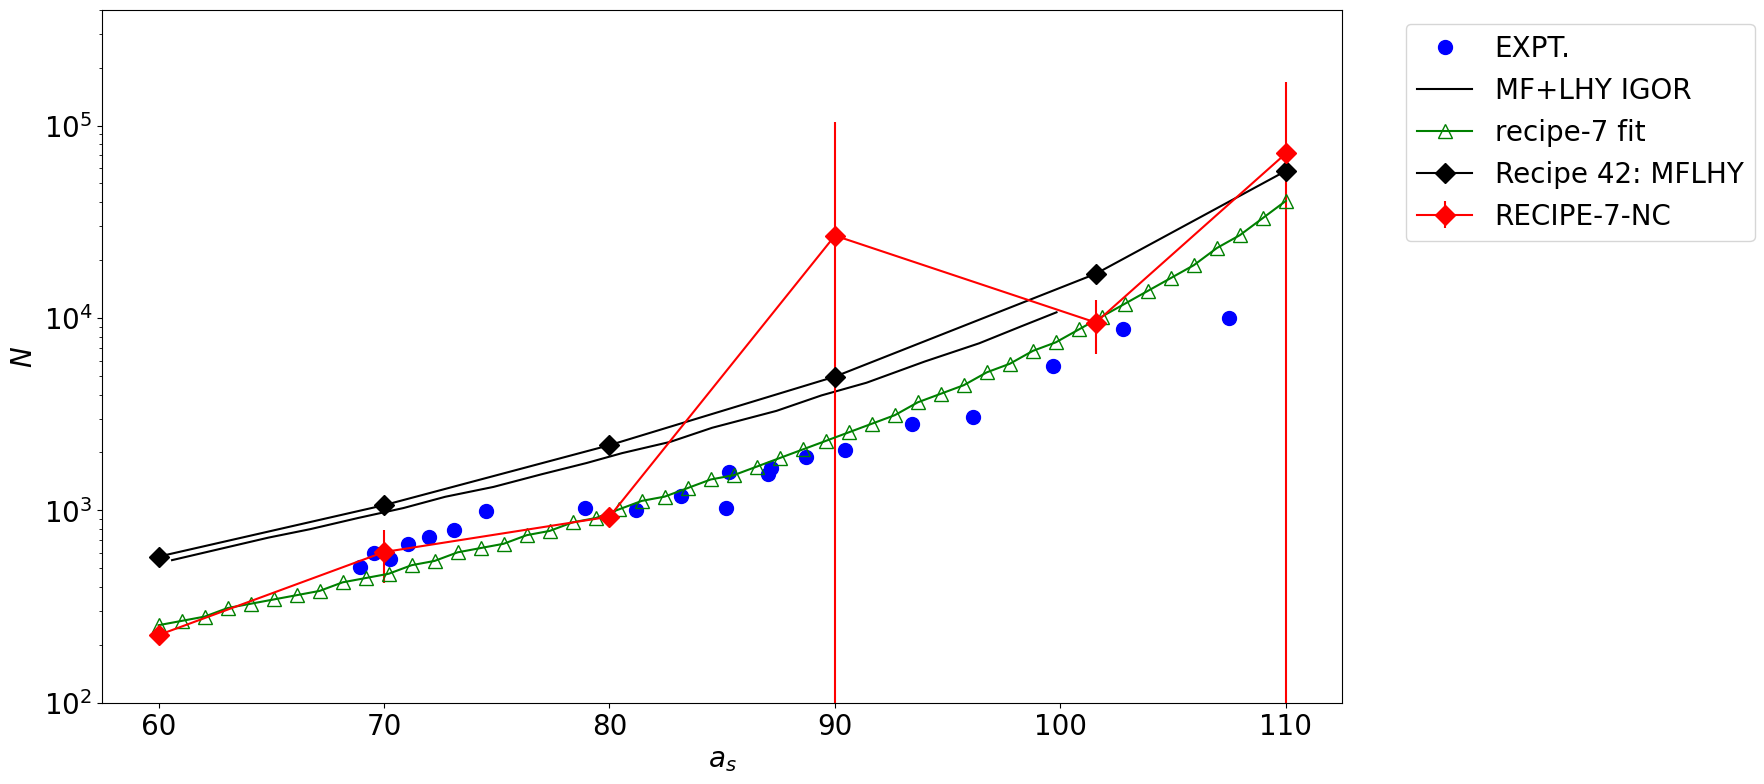

In [ ]:

plt.figure(figsize=(16, 9))

def log_func_fit(x, a, b, c):
    return a*x**2 + b*x + c
def func_fit(x, a, b, c):
    return np.exp(log_func_fit(x, a, b, c))
data = np.loadtxt("./experimental-data/combined-critical-atom-number.dat")
sclen_expt = data[:,0]
nc_expt = data[:,1]
popt, pcov = curve_fit(f=log_func_fit, xdata=sclen_expt, ydata=np.log(nc_expt))

plt.plot(sclen_expt, nc_expt, label="EXPT.", ls='', marker='o', color='blue', markersize=10)


mf_data = np.loadtxt("./experimental-data/mean_field_IGOR.dat")
sclen_mf = mf_data[:,0]
nc_mf = mf_data[:,1]
plt.plot(sclen_mf, nc_mf, label="MF+LHY IGOR", color='black', markersize=10)

# load data from file ./results/critical-atom-numbers/recipe-7-nc/functionals_E_N_average_std.dat and plot it
data = np.loadtxt("./results/critical-atom-numbers/recipe-7-nc/functionals_E_N_average_std.dat")
sclen = data[:,0]
nc = data[:,1]
nc_std = data[:,2]
plt.errorbar(sclen, nc, yerr=nc_std, label="RECIPE-7-NC", color='red', ls='-', marker='D', markersize=10)




# same, but for recipe 8
data = np.loadtxt("./results/critical-atom-numbers/recipe-8-nc/functionals_E_N_average_std.dat")
sclen = data[:,0]
nc = data[:,1]
nc_std = data[:,2]
# plot the green error bars, but with the line, with non filled markers
# plt.errorbar(sclen, nc, yerr=nc_std, label="RECIPE-8-NC", color='green', ls='-', marker='^', markersize=10, markerfacecolor='none')


plt.plot(a_s, n_c_best_possible_fit, label="recipe-7 fit", color='green', ls='-', marker='^', markersize=10, markerfacecolor='none')

# Open the output file for writing
# data = np.loadtxt("results/critical-atom-numbers/recipe-7-nc/functionals_E_N_2nd_approach.dat")
# # the header is as follows: a_s <n_c>  err(n_c)  <beta>  err(beta) <gamma>  \n"). Read the data and plot
# sclen = data[:,0]
# nc = data[:,1]
# nc_std = data[:,2]
# plt.errorbar(sclen, nc, yerr=nc_std, label="RECIPE-7-NC-2ND-APPROACH", color='green', ls='-', marker='o', markersize=10)

data = np.loadtxt("./results/critical-atom-numbers/recipe-42-nc/functionals_E_N.dat")
sclen = data[:,0]
nc = data[:,1]
plt.plot(sclen, nc, label="Recipe 42: MFLHY", color='black', marker='D', ls='-', markersize=10)


plt.xlabel(r'$a_s$', fontsize=20)
plt.ylabel(r'$N$', fontsize=20)
plt.legend(loc = "best", bbox_to_anchor=(1.04, 1), fontsize=20)


plt.yscale('log')
plt.ylim(100, 400000)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Save the figure into plots folder
plt.savefig(f"plots/critical-atom-number.pdf", bbox_inches='tight', dpi=300)
plt.savefig(f"plots/critical-atom-number.png", bbox_inches='tight', dpi=300)
